In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/test.csv')

# Preprocessing

In [ ]:
df = df.iloc[:50000]

In [ ]:
df.dropna()
df_test.dropna()

,time,Gb(i),Gd(i),H_sun,T2m,WS10m,dataset_id
0,2018-03-26 00:00:00,0.0,0.0,0.0,1.76,1.52,1
1,2018-03-26 00:15:00,0.0,0.0,0.0,1.57,1.52,1
2,2018-03-26 00:30:00,0.0,0.0,0.0,1.38,1.52,1
3,2018-03-26 00:45:00,0.0,0.0,0.0,1.19,1.52,1
4,2018-03-26 01:00:00,0.0,0.0,0.0,1.00,1.52,1
...,...,...,...,...,...,...,...
7387,2020-10-17 22:45:00,0.0,0.0,0.0,4.25,1.38,11
7388,2020-10-17 23:00:00,0.0,0.0,0.0,4.16,1.38,11
7389,2020-10-17 23:15:00,0.0,0.0,0.0,4.06,1.40,11
7390,2020-10-17 23:30:00,0.0,0.0,0.0,3.96,1.42,11


In [ ]:
df.head()

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1


In [ ]:
df_test.head()

,time,Gb(i),Gd(i),H_sun,T2m,WS10m,dataset_id
0,2018-03-26 00:00:00,0.0,0.0,0.0,1.76,1.52,1
1,2018-03-26 00:15:00,0.0,0.0,0.0,1.57,1.52,1
2,2018-03-26 00:30:00,0.0,0.0,0.0,1.38,1.52,1
3,2018-03-26 00:45:00,0.0,0.0,0.0,1.19,1.52,1
4,2018-03-26 01:00:00,0.0,0.0,0.0,1.00,1.52,1


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.set_index(df['time'], inplace=True)

df_test['time'] = pd.to_datetime(df_test['time'])
df_test.set_index(df_test['time'], inplace=True)

In [ ]:
df.sort_index(inplace=True)

df_test.sort_index(inplace=True)

In [ ]:
df.isnull().sum()

time             0
P                0
Gb(i)            0
Gd(i)            0
H_sun            0
T2m              0
WS10m            0
load             0
residual_load    0
dataset_id       0
dtype: int64

In [ ]:
df.head(5)

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
time,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
2018-01-01 00:15:00,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2018-01-01 00:30:00,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
2018-01-01 00:45:00,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
2018-01-01 01:00:00,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1


# EDA

In [ ]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2018-01-01 00:00:00 to 2019-07-29 18:45:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           50000 non-null  datetime64[ns]
 1   P              50000 non-null  float64       
 2   Gb(i)          50000 non-null  float64       
 3   Gd(i)          50000 non-null  float64       
 4   H_sun          50000 non-null  float64       
 5   T2m            50000 non-null  float64       
 6   WS10m          50000 non-null  float64       
 7   load           50000 non-null  float64       
 8   residual_load  50000 non-null  float64       
 9   dataset_id     50000 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 4.2 MB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                             time             P         Gb(i)         Gd(i)  \
count                       50000  50000.000000  50000.000000  50000.000000   
mean   2018-10-11 21:46:53.400000    100.276849     88.388044     66.659358   
min           2018-01-01 00:00:00      0.000000      0.000000      0.000000   
25%           2018-05-20 04:56:15      0.000000      0.000000      0.000000   
50%           2018-10-15 09:52:30      2.215000      0.000000      7.685000   
75%           2019-03-03 13:48:45    147.285000     62.940000    117.100000   
max           2019-07-29 18:45:00    664.030000    920.510000    437.380000   
std                           NaN    158.617279    181.685343     93.210062   

              H_sun           T2m         WS10m          load  residual_load  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean      13.515872     10.080503      2.637985    154.844490      54.567641   
min        0.000000    -11.

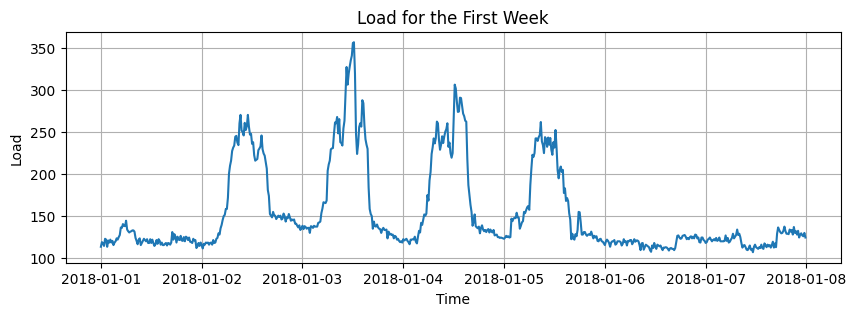

In [ ]:
first_week_data = df.loc['2018-01-01':'2018-01-07']

plt.figure(figsize=(10, 3))
plt.plot(first_week_data.index, first_week_data['load'])
plt.title('Load for the First Week')
plt.xlabel('Time')
plt.ylabel('Load')
plt.grid(True)
plt.show()

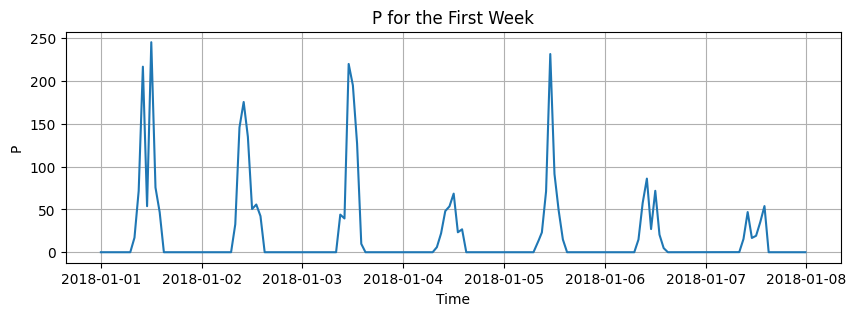

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(first_week_data.index, first_week_data['P'])
plt.title('P for the First Week')
plt.xlabel('Time')
plt.ylabel('P')
plt.grid(True)
plt.show()

Based on plots above, short term dependencies can be captured on a weekly basis.

1 week-> 7 * 24 * 4 = 672

# Datetime Features

In [ ]:
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

In [ ]:
df_test['month'] = df_test.index.month
df_test['day'] = df_test.index.day
df_test['hour'] = df_test.index.hour
df_test['day_of_week'] = df_test.index.dayofweek

# Scaling Features

In [ ]:
df_train = df.drop(columns=['time'])

In [ ]:
df_train.columns

Index(['P', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'load', 'residual_load',
       'dataset_id', 'month', 'day', 'hour', 'day_of_week'],
      dtype='object')

In [ ]:
df_test_2 = df_test.drop(columns=['time'])

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler = scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)

In [ ]:
scaler = scaler.fit(df_test_2)
df_test_scaled = scaler.transform(df_test_2)

# Train (LSTM)

In [ ]:
df_train_scaled.shape

(50000, 13)

In [ ]:
df_test_scaled.shape

(7392, 10)

In [ ]:
trainX = []
trainY = []

In [ ]:
n_past = 672
n_future = 4

In [ ]:
for i in range(n_past, len(df_train_scaled) - n_future + 1):
  past_sequence = df_train_scaled[i - n_past:i, :]
  past_sequence = np.delete(past_sequence, [0, 6, 7], axis=1)
  future_values = df_train_scaled[i:i + n_future, [0, 6, 7]]

  trainX.append(past_sequence)
  trainY.append(future_values)

In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)

In [ ]:
print("Shape of trainX:", trainX.shape)
print("Shape of trainY:", trainY.shape)

Shape of trainX: (49325, 672, 10)
Shape of trainY: (49325, 4, 3)


In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Reshape

In [ ]:
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(trainY.shape[2]))
model.add(Reshape((-1, trainY.shape[2])))
model.add(TimeDistributed(Dense(trainY.shape[2])))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                840       
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
 reshape (Reshape)           (None, 1, 3)              0         
                                                                 
 time_distributed (TimeDist  (None, 1, 3)              12        
 ributed)                                                        
                                                                 
Total params: 885 (3.46 KB)
Trainable params: 885 (3.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=192, validation_split=0.1)

Epoch 1/10
232/232 [==============================] - 60s 242ms/step - loss: 0.6477 - val_loss: 0.3894
Epoch 2/10
232/232 [==============================] - 58s 248ms/step - loss: 0.3782 - val_loss: 0.2894
Epoch 3/10
232/232 [==============================] - 57s 246ms/step - loss: 0.2416 - val_loss: 0.2370
Epoch 4/10
232/232 [==============================] - 58s 248ms/step - loss: 0.1737 - val_loss: 0.2356
Epoch 5/10
232/232 [==============================] - 57s 247ms/step - loss: 0.1471 - val_loss: 0.2133
Epoch 6/10
232/232 [==============================] - 57s 247ms/step - loss: 0.1354 - val_loss: 0.2140
Epoch 7/10
232/232 [==============================] - 57s 245ms/step - loss: 0.1290 - val_loss: 0.2010
Epoch 8/10
232/232 [==============================] - 58s 248ms/step - loss: 0.1247 - val_loss: 0.1985
Epoch 9/10
232/232 [==============================] - 58s 248ms/step - loss: 0.1216 - val_loss: 0.1844
Epoch 10/10
232/232 [==============================] - 58s 250ms/step - l

# Training and Validation Loss

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [ ]:
training_loss

[0.6477180123329163,
 0.37820330262184143,
 0.24155183136463165,
 0.1737179160118103,
 0.14714789390563965,
 0.135393425822258,
 0.12904036045074463,
 0.12466604262590408,
 0.12159613519906998,
 0.1196872815489769]

In [ ]:
validation_loss

[0.3893999755382538,
 0.2893699109554291,
 0.23696903884410858,
 0.23563161492347717,
 0.21330511569976807,
 0.21402791142463684,
 0.20095685124397278,
 0.1985388845205307,
 0.18444018065929413,
 0.18376128375530243]

In [ ]:
df_test_scaled.shape

(7392, 10)

# Result

In [ ]:
testX = []

for i in range(n_past, len(df_test_scaled) - n_future + 1):
    past_sequence = df_test_scaled[i - n_past:i, :]

    testX.append(past_sequence)

testX = np.array(testX)

predictions = model.predict(testX)

210/210 [==============================] - 8s 39ms/step


In [ ]:
predictions = np.reshape(predictions, (predictions.shape[0], predictions.shape[2]))

In [ ]:
print("Shape of predictions array:", predictions.shape)

Shape of predictions array: (6717, 3)


In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['P', 'load', 'residual_load'])

In [ ]:
predictions_df.head()

,P,load,residual_load
0,-0.648793,-0.340476,0.462646
1,-0.860928,-0.592467,0.677754
2,-0.728317,-0.552492,0.574355
3,-0.663915,-0.550368,0.526375
4,-0.618772,-0.567645,0.487790


In [ ]:
predictions_df['residual_load'] = predictions_df['load'] - predictions_df['P']

In [ ]:
predictions_df.head()

,P,load,residual_load
0,-0.648793,-0.340476,0.308317
1,-0.860928,-0.592467,0.268460
2,-0.728317,-0.552492,0.175825
3,-0.663915,-0.550368,0.113546
4,-0.618772,-0.567645,0.051127


In [ ]:
test_df_copy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/test.csv')

In [ ]:
predictions_df['time'] = test_df_copy['time']

In [ ]:
predictions_df.head()

,P,load,residual_load,time
0,-0.648793,-0.340476,0.308317,2018-03-26 00:00:00
1,-0.860928,-0.592467,0.268460,2018-03-26 00:15:00
2,-0.728317,-0.552492,0.175825,2018-03-26 00:30:00
3,-0.663915,-0.550368,0.113546,2018-03-26 00:45:00
4,-0.618772,-0.567645,0.051127,2018-03-26 01:00:00


In [ ]:
predictions_df['time'] = pd.to_datetime(predictions_df['time'])
predictions_df.set_index(predictions_df['time'], inplace=True)

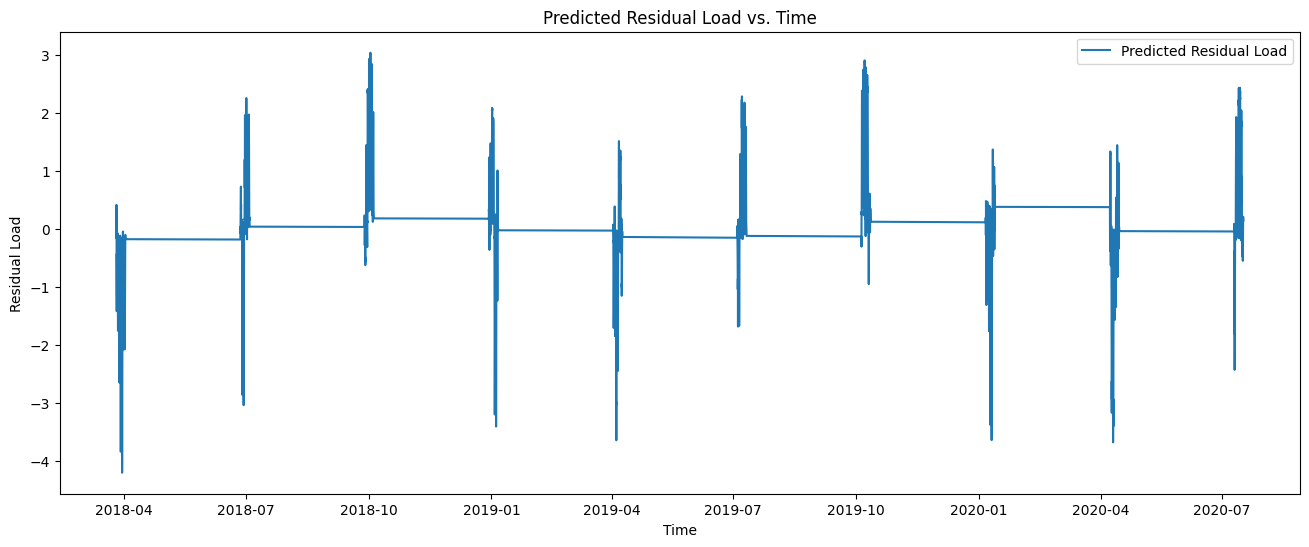

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(predictions_df.index, predictions_df['residual_load'], label='Predicted Residual Load')
plt.xlabel('Time')
plt.ylabel('Residual Load')
plt.title('Predicted Residual Load vs. Time')
plt.legend()
plt.show()

In [ ]:
df_train_plot = pd.DataFrame(df_train_scaled)

In [ ]:
new_column_names = ['P', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'load', 'residual_load', 'dataset_id', 'month', 'day', 'hour', 'day_of_week']

df_train_plot.columns = new_column_names

In [ ]:
df_train_plot.head()

,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id,month,day,hour,day_of_week
0,-0.6322,-0.486495,-0.715159,-0.755734,-0.114937,2.053980,-0.713100,0.400242,-1.459591,-1.406963,-1.796412,-1.660924,-1.49935
1,-0.6322,-0.486495,-0.715159,-0.755734,-0.140992,2.091434,-0.618237,0.437595,-1.459591,-1.406963,-1.796412,-1.660924,-1.49935
2,-0.6322,-0.486495,-0.715159,-0.755734,-0.168231,2.128887,-0.644109,0.427408,-1.459591,-1.406963,-1.796412,-1.660924,-1.49935
3,-0.6322,-0.486495,-0.715159,-0.755734,-0.194286,2.173832,-0.695852,0.407033,-1.459591,-1.406963,-1.796412,-1.660924,-1.49935
4,-0.6322,-0.486495,-0.715159,-0.755734,-0.220340,2.211286,-0.549246,0.464761,-1.459591,-1.406963,-1.796412,-1.516439,-1.49935


In [ ]:
df_train_copy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/train.csv')

In [ ]:
df_train_plot['time'] = df_train_copy['time']
df_train_plot['time'] = pd.to_datetime(df_train_plot['time'])
df_train_plot.set_index(df_train_plot['time'], inplace=True)

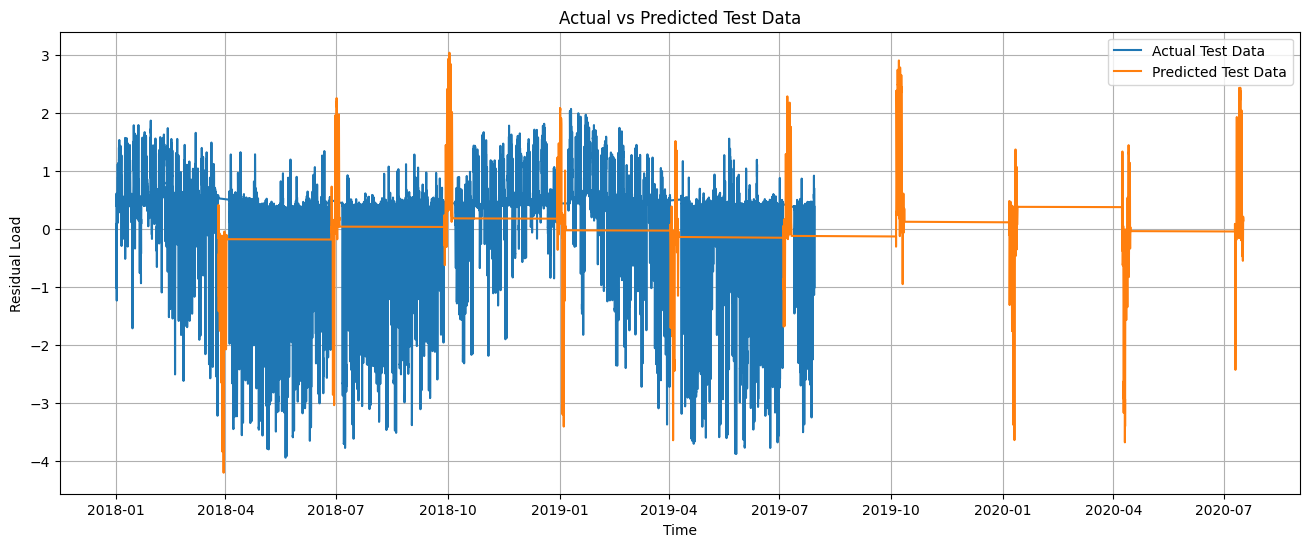

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df_train_plot.index, df_train_plot['residual_load'], label='Actual Test Data')
plt.plot(predictions_df.index, predictions_df['residual_load'], label='Predicted Test Data')
plt.xlabel('Time')
plt.ylabel('Residual Load')
plt.title('Actual vs Predicted Test Data')
plt.legend()
plt.grid(True)
plt.show()

# RMSE on Validation Data

In [ ]:
trainX.shape

(49325, 672, 10)

In [ ]:
trainY.shape

(49325, 4, 3)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X_train_reshaped = trainX.reshape((-1, 10))
y_train_reshaped = trainY.reshape((-1, 3))

X_train_reshaped = pd.DataFrame(X_train_reshaped)
y_train_reshaped = pd.DataFrame(y_train_reshaped)

X_train_reshaped = X_train_reshaped.iloc[:20000]
y_train_reshaped = y_train_reshaped.iloc[:20000]

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_reshaped, y_train_reshaped, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()
xgb_model.fit(X_train_split, y_train_split)

y_pred_val = xgb_model.predict(X_val)

In [ ]:
y_pred_val = pd.DataFrame(y_pred_val, columns=['P', 'load', 'residual_load'])

In [ ]:
new_names = ['P', 'load', 'residual_load']

y_val.columns = new_names

In [ ]:
y_pred_val['residual_load'] = y_pred_val['load'] - y_pred_val['P']

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
val_rmse = mean_squared_error(y_val.load, y_pred_val.load, squared=False)
print("Validation RMSE (load):", val_rmse)

Validation RMSE (load): 1.0886541597874038


In [ ]:
val_rmse = mean_squared_error(y_val.P, y_pred_val.P, squared=False)
print("Validation RMSE (P):", val_rmse)

Validation RMSE (P): 0.5773086673575603


In [ ]:
val_rmse = mean_squared_error(y_val.residual_load, y_pred_val.residual_load, squared=False)
print("Validation RMSE (residual_load):", val_rmse)

Validation RMSE (residual_load): 0.6205990124051869
